In [1]:
## dataframes, matrices and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
train_path = "x__data/train"
test_path = "x__data/test"


client_train = pd.read_csv(f"{train_path}/client_train.csv")
invoice_train = pd.read_csv(f"{train_path}/invoice_train.csv", low_memory=False)

client_test = pd.read_csv(f"{test_path}/client_test.csv")
invoice_test = pd.read_csv(f"{test_path}/invoice_test.csv")

# Inspecting the data

In [3]:
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [4]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


## Any Missing ?

In [5]:
client_train.isna().any()

disrict          False
client_id        False
client_catg      False
region           False
creation_date    False
target           False
dtype: bool

In [6]:
invoice_train.isna().any()

client_id               False
invoice_date            False
tarif_type              False
counter_number          False
counter_statue          False
counter_code            False
reading_remarque        False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
consommation_level_4    False
old_index               False
new_index               False
months_number           False
counter_type            False
dtype: bool

## How many `frauds` against `nots`

In [7]:
client_train["target"].value_counts(normalize=True)

target
0.0    0.944159
1.0    0.055841
Name: proportion, dtype: float64

## Merging

In [8]:
client_merged = pd.merge(client_train, invoice_train, on="client_id")

In [9]:
client_merged.drop(client_merged.query("counter_statue not in ['0','1','2','3','4','5']").index)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,train_Client_99998,11,101,22/12/1993,0.0,2005-08-19,10,1253571,0,...,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,60,train_Client_99998,11,101,22/12/1993,0.0,2005-12-19,10,1253571,0,...,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,60,train_Client_99999,11,101,18/02/1986,0.0,1996-09-25,11,560948,0,...,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,60,train_Client_99999,11,101,18/02/1986,0.0,1996-05-28,11,560948,0,...,6,1,603,0,0,0,13281,13884,4,ELEC


## Merging `client` and `invoice_data`

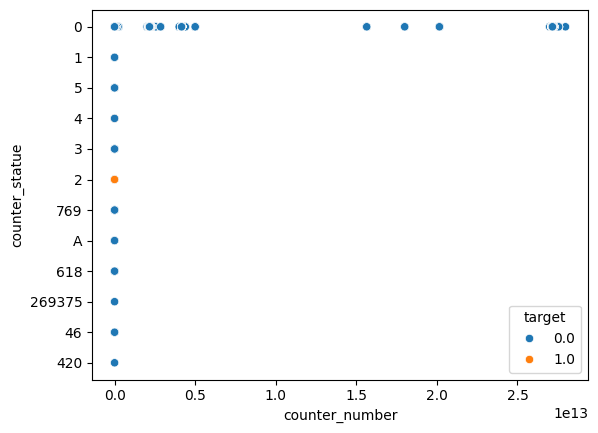

In [11]:
sns.scatterplot(client_merged, x="counter_number", y="counter_statue", hue="target")
plt.show()

In [12]:
client_merged[client_merged["counter_statue"] == "2"]["target"].value_counts()

target
0.0    30
1.0     2
Name: count, dtype: int64

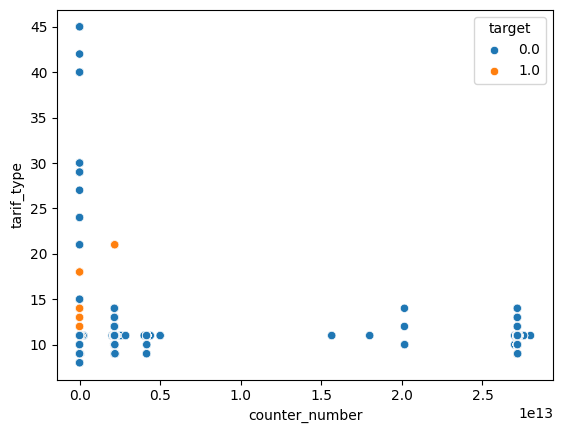

In [13]:
sns.scatterplot(client_merged, x="counter_number", y="tarif_type", hue="target")
plt.show()

In [14]:
client_merged[client_merged["counter_number"]==0]["target"].value_counts()

target
0.0    39619
1.0     3542
Name: count, dtype: int64

## cleaning some parts

In [15]:
client_merged["counter_type"] = client_merged["counter_type"].map({"ELEC": 0, "GAZ": 1})
client_merged.drop(client_merged.query("counter_statue not in ['0','1','2','3','4','5']").index, inplace=True)
client_merged["counter_statue"] = client_merged["counter_statue"].astype(np.int8)

# Looking for outliers

### Consommation_level_1

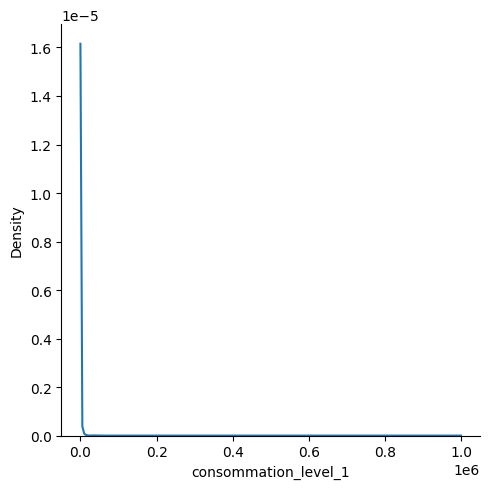

In [20]:
sns.displot(client_merged["consommation_level_1"], kind="kde")

<Axes: ylabel='consommation_level_1'>

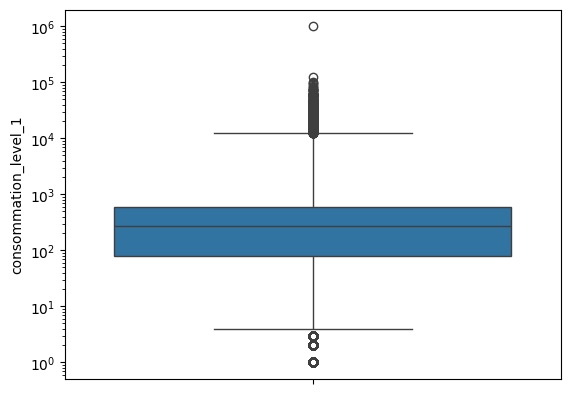

In [21]:
sns.boxplot(client_merged["consommation_level_1"],log_scale=True)

C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4657: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4657: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


<Axes: xlabel='consommation_level_1', ylabel='target'>

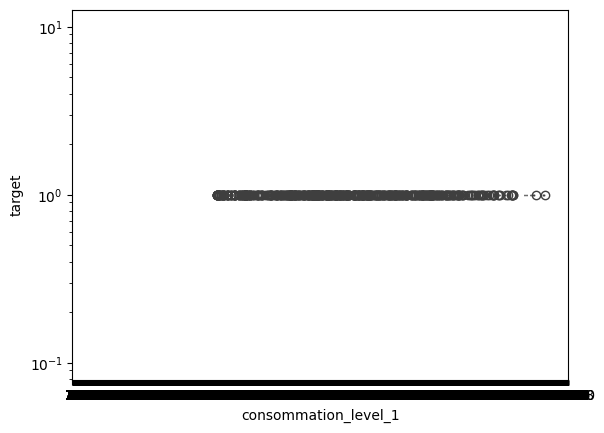

In [34]:
sns.boxplot(client_merged, x="consommation_level_1", y="target")

In [22]:
lq = client_merged["consommation_level_1"].describe()["25%"]
uq = client_merged["consommation_level_1"].describe()["75%"]
iqr = uq-lq

In [23]:
client_merged[client_merged["consommation_level_1"] > uq+2*iqr]["target"].value_counts()

target
0.0    65266
1.0     7657
Name: count, dtype: int64

In [37]:
ids = client_merged[client_merged["consommation_level_1"] > uq+2*iqr]["client_id"].unique()
client_train[client_train["client_id"].isin(ids)]["target"].value_counts()

target
0.0    27418
1.0     2408
Name: count, dtype: int64

In [24]:
client_merged[client_merged["consommation_level_1"] < lq-2*iqr]["target"].value_counts()

Series([], Name: count, dtype: int64)

### Consommation_Level_2

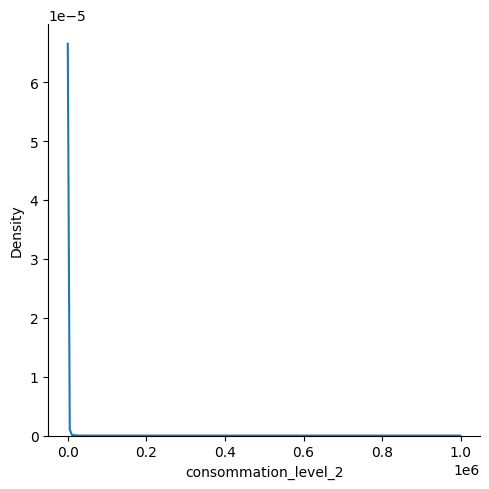

In [16]:
sns.displot(client_merged["consommation_level_2"], kind="kde")

C:\Users\Eli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: ylabel='consommation_level_2'>

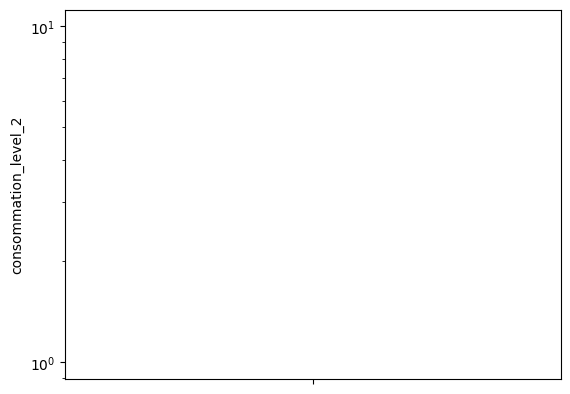

In [46]:
sns.boxplot(client_merged["consommation_level_2"])

In [18]:
lq = client_merged["consommation_level_2"].describe()["25%"]
uq = client_merged["consommation_level_2"].describe()["75%"]
iqr = uq-lq

In [19]:
client_merged[client_merged["consommation_level_2"] > uq+2*iqr]["target"].value_counts()

target
0.0    593636
1.0     66912
Name: count, dtype: int64

In [38]:
ids = client_merged[client_merged["consommation_level_2"] > uq+2*iqr]["client_id"].unique()
client_train[client_train["client_id"].isin(ids)]["target"].value_counts()

target
0.0    9684
1.0    1215
Name: count, dtype: int64

In [47]:
client_merged[client_merged["consommation_level_3"] > 0]["target"].value_counts()

target
0.0    159820
1.0     23538
Name: count, dtype: int64

## Some correlations

In [60]:
frauds = client_merged[client_merged["target"] == 1]
non_frauds = client_merged[client_merged["target"] == 0]

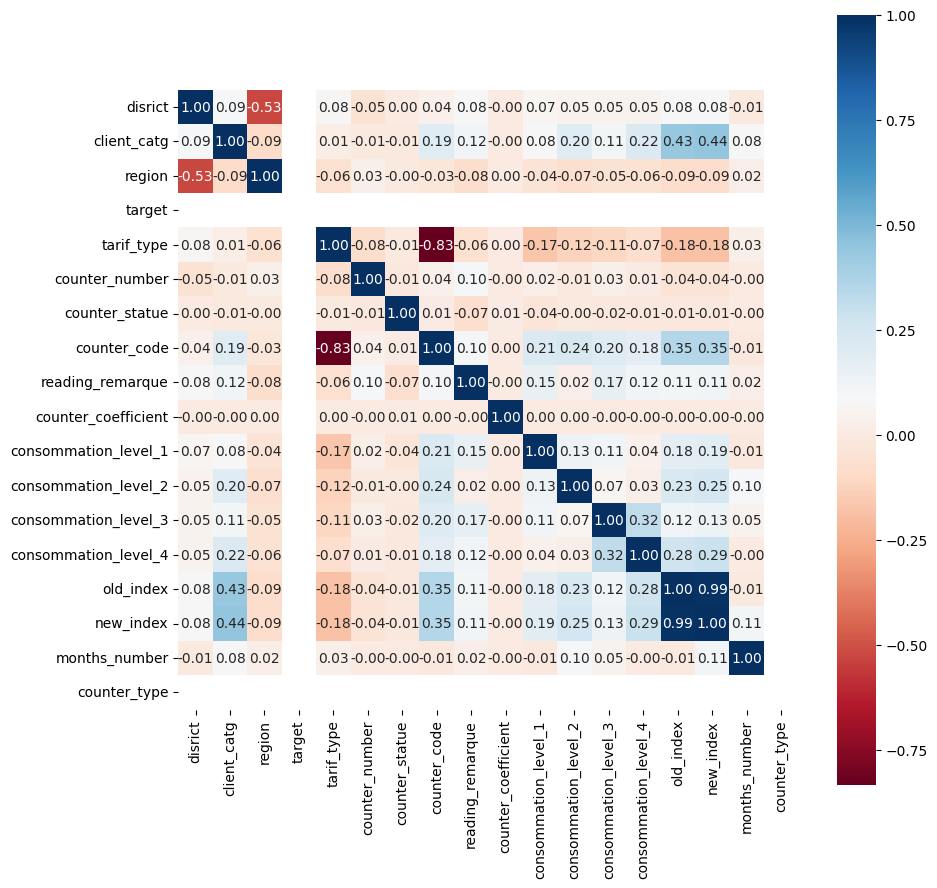

In [62]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(frauds.select_dtypes("number").corr(), annot=True, fmt=".2f", square=True, cmap="RdBu")
plt.show()

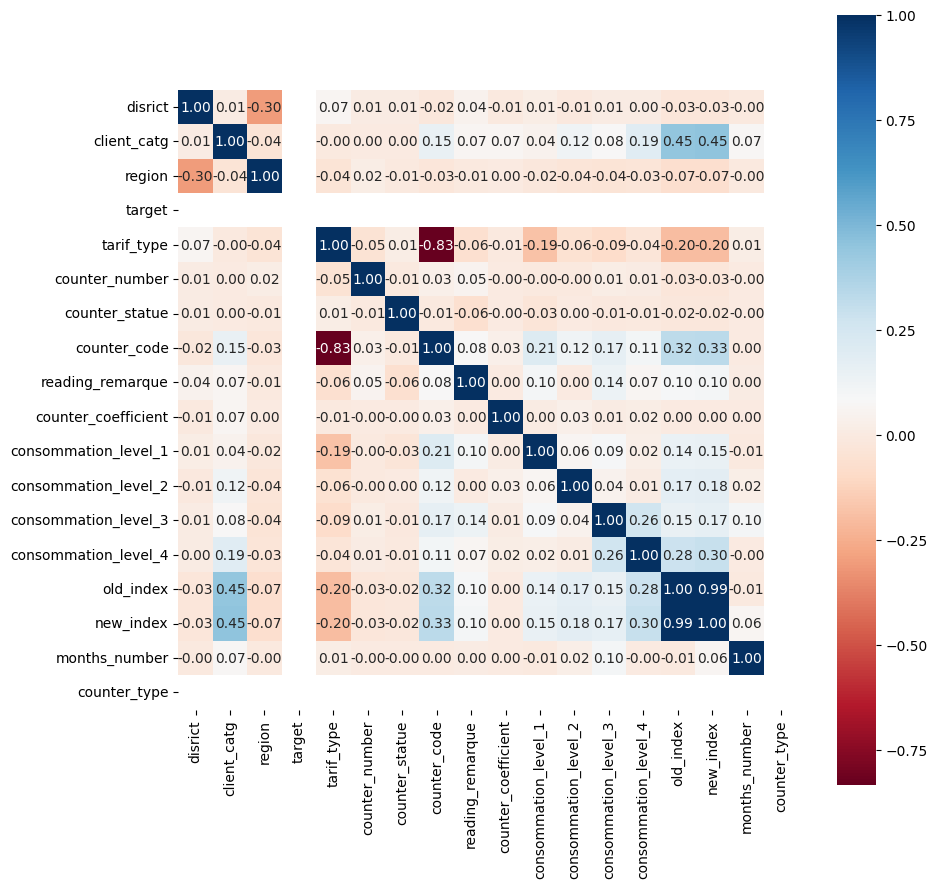

In [64]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(non_frauds.select_dtypes("number").corr(), annot=True, fmt=".2f", square=True, cmap="RdBu")
plt.show()

In [14]:
# client_merged.groupby("client_id").agg({"consommation_level_1": ["sum"], "consommation_level_2": ["max"]})
client_train

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0
135489,63,train_Client_99996,11,311,25/10/2012,0.0
135490,63,train_Client_99997,11,311,22/11/2011,0.0
135491,60,train_Client_99998,11,101,22/12/1993,0.0


# Things to fix
- remove character from `counter_statue` feature
- create outlier feature

In [37]:
client_merged["target"].value_counts()

target
0.0    4123637
1.0     353112
Name: count, dtype: int64